## PyTorch Computer Vision

**Computer vision** is the art of teaching a computer to see.

For example, it could involve building a model to classify whether a photo is a cat or a dog (**binary classification**).

Or whether a photo is a cat, dog or chicken(**multi-class classification**)

Or identifying where a car appears in a video frame (**object detection**)

Or figuring out where different objects in an image can be seperated (**panoptic segmentation**).

#### 0. Computer vision libraries in PyTorch

Before we get started writing code, let's talk about some PyTorch computer vision libraries you should be aware of.

| **PyTorch module** | **What does it do?** |
| --- | --- |
| `torchvision` | Contains datasets, model architectures and image transformations often used for computer vision problems. |
| `torchvision.datasets` | Contains many example of computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains a series of base classes for making custom datasets. |
| `torchvision.models` | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. |
| `torchvision.transforms`| Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. |
| `torch.utils.data.Datasets` | Base dataset class for PyTorch. |
| `torch.utils.data.DataLoader` | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). |

**Note**: The `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.


In [144]:
# import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
torchvision.__version__

'0.16.1'

#### 1. Getting a dataset

To begin working on a computer vision problem, let's get a computer vision datset.

We're going to start with FasionMNIST.

MNIST stand for Modified National Institute of Standards and Technology.

The original MNIST dataset contains thousands of examples of handwritten digits (from 0 to 9) and was used to build computer vision models to identify numbers for postal services.

FashionMNIST, is a similar setup

Except it contains grayscale images of 10 different kinds of clothing.

![Image](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-fashion-mnist-slide.png)

`torchvision.datasets` contains a lot of example datasets you can use to practice writing computer vision code on. FashionMNIST is one of those datasets. And since it has 10 different image classes (different types of clothing), it's a multi-class classification problem.

Later, we'll be building a computer vision neural network to identify the different styles of clothing in these images.

PyTorch has a bunch of common computer vision datasets stored in `torchvision.datasets`.

Including FashionMNIST in `torchvision.datasets.FashionMNIST()`.

To download it, we provded the following parameters:
* `root: str` - which folder do you want to download the data to?
* `train: Bool` - do you want the training or test split?
* `transform: torchvision.transforms` - what transformations would you like to do on the data?
* `target_transform` - you can transform the targets (labels) if you like too.

Many other datasets in `torchvision` have these parameter options.


In [145]:
# Setup training data
train_data = datasets.FashionMNIST(
    root='data', # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can tranform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root='data',
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

In [146]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

##### 1.1 Input and output shapes of a computer vision model

Since it's a big tensor of values (the image) leading to a single value for the target (the label). Therefore, we need to know the shape.

In [147]:
# What's the shape of the image?
image.shape

torch.Size([1, 28, 28])

The shape of the image tensor is `[1, 28, 28]` or more specifically:

    [color_channels=1, height=28, width=28]

Having `color_channels=1` means the image is grayscale.

![](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-input-and-output-shapes.png)

If the `color_channels=3`, the image comes in pixel values for red, green and blue (known as RGB color model).

The order of our current tensor often referred to as `CHW` (Color Channels, Height, Width).

**Note**: You'll also see `NCHW` and `NHWC` formats where `N` stands for *number of images*. For example if you have a `batch_size=32`, your tensor shape may be `[32, 1, 28,28]`. We'll cover batch sizes later.

PyTorch generally accepts `NCHW` (channel first) as the default for many operators.

However, PyTorch also explains that `NHWC` (channel last) performs better and is considered best practice.

For now, since our dataset and models are relatively small, this won't make too much of a difference.

But keep it in mind for when you're working on larger image datasets and using CNN

In [148]:
# How many samples are there?
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

So we've got 60,000 training samples and 10,000 testing samples.

What classes are there?

We can find these via the `.classes` attribute.

In [149]:
# See classses
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

We are dealing with 10 different kinds of clothes. It means the problem is **multi_class classifications**.

##### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

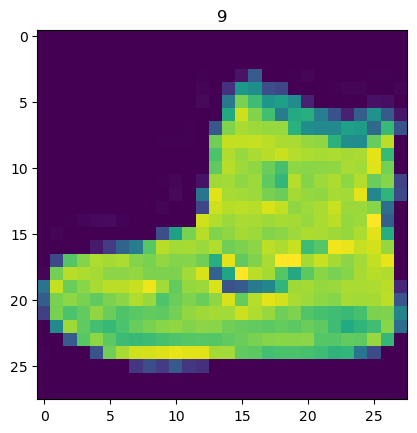

In [150]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f'Image shape: {image.shape}')
plt.imshow(image.squeeze())
plt.title(label)

We can turn the image into grayscale using `cmap` parameter of `plt.imshow()`.

Text(0.5, 1.0, 'Ankle boot')

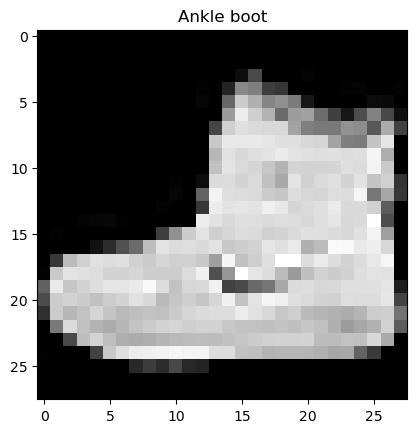

In [151]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])

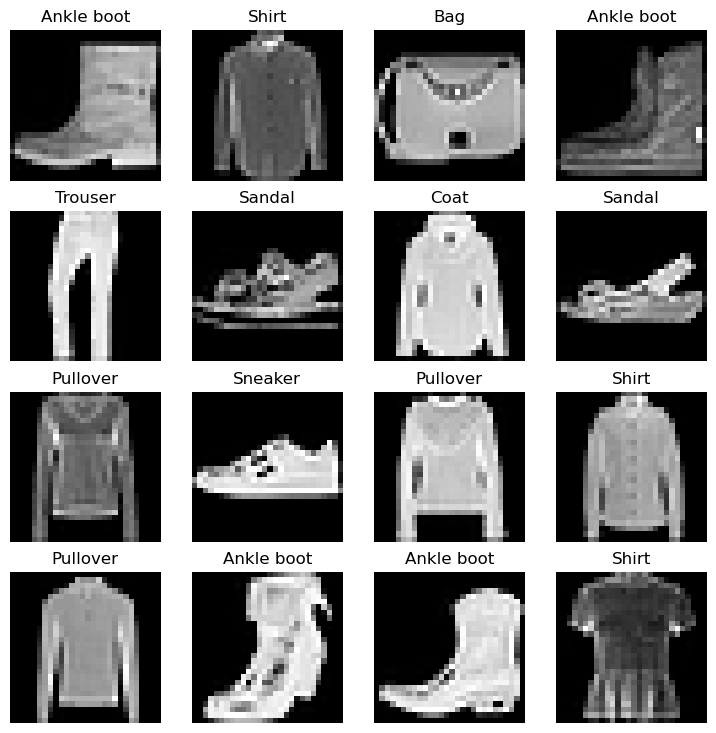

In [152]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

This datasent doesn't look too aesthetic.

But the principles we're going to learn on how to build a model for it will be similar across a wide range of computer vision problems.

In essence, taking pixel values and building a model to find patterns in them to use on future pixel values.

Plut, even for this small dataset (yes, even 60,000 images in deep learning is considered quite small), could you write a program to classify each one of them?

You probably could, but I think coding a model in PyTorch would be faster.

#### Prepare Dataloader

The next step is to prepare it with a `torch.utils.data.DataLoader` or `DataLoader` for short.

The `DataLoader` does what you think it might do.

It helps load data into a model.

For training and for inference.

It turns a large `Dataset` into a Python iterable of smaller chunks.

These smaller chunks are called **batches** or **mini-batches** and can be set by the `batch_size` parameter.

Why do this?

In an ideal world you do the forward pas and backward pass across all of your data at once.

But once you start using really large datasets, unless you've got infinite computing power, it's easier to break them up into batches.

It also give your model more opportunities to improve.

With **mini-batches** (small portions of teh data), gradient descent is performed more often per epoch (once per mini-batch rather than once per epoch).

What is a good batch size?

**32 is a good place to start** for a fair amount of problems.

But since this is a value you can set (a **hyperparameter**) you can try all different of values, though generally powers of 2 are used most often (e.g. 32, 64, 128, 256, 512).

*Batching FashionMNIST* with a batch size of 32 and shuffle turned on. A *similar batching process will occur for other datasets but will differ depending on the batch size*.

Let's create `DataLoader`'s for our training and test sets.

In [153]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(
    train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch?
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's checkout what we've created
print(f'Dataloaders: {train_dataloader, test_dataloader}')
print(f'Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}')
print(f'Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}')

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001AE12F41CD0>, <torch.utils.data.dataloader.DataLoader object at 0x000001AE477A22D0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [154]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


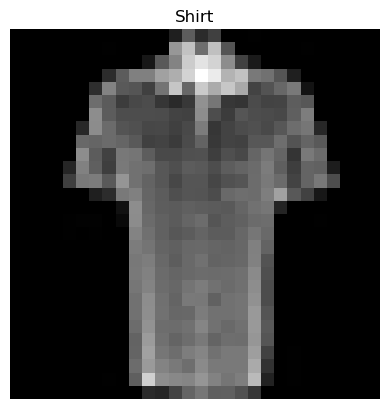

In [155]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis("Off")
print(f'Image size: {img.shape}')
print(f'Label: {label}, label size: {label.shape}')

#### 3. Model 0: Build a baseline model

Data loaded and prepared!

Time to build a **baseline model** by subclassing `nn.Module`.

A **baseline model** is one of the simplest models you can imagine.

You use the baseline as a starting and try to improve upon it with subsequent, more complicated models.

Our baseline will consist of two `nn.Linear()` layers.

We've done this in a previous section but there's going to one slight difference.

Because we're working with image data, we're going to use a different layer to start things off.

And that's the `nn.Flatten()` layer.

`nn.Flatten()` compresses the dimensions of a tensor into a single vector.

This easier to understand when you see it.

In [156]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Printout what happened
print(f'Shape before flattening: {x.shape} -> [color_channels, height, width]')
print(f'Shape after flattening: {output.shape} -> [color_channels, height*width]')

print(x)
print(output)

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 

The `nn.Flatten()` layer took our shape from `[color_channels, height, width]` to `[color_channels, height*width]`.

Why do this?

Because we've now turned our pixel data from height and width dimensions into one long **feature vector**.

And `nn.Linear()` layers like their inputs to be in the form of feature vectors.

Let's create our first model using `nn.Flatten()` as the first layer

In [157]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

We've got a baseline model class we can use, now let's instantiate a model.

We'll need to set the following parameters:
* `input_shape=784` - this is how many features you've got going in the model, in our case, it's one for every pixel in the target imge (28 pixels high by 28 pixels wide = 784 features).
* `hidden_units=10` - number of units/neurons in the hidden layers(s), this number could be whatever you want but to keep the model small we'll start with `10`.
* `output_shape=len(class_names)` - since we're working with a multi-class classification problem, we need an output neuron per class in our datasets.

Let's create an instance of our model and send to the CPU for now (we'll run a small test for running `model_0` on CPU vs. similar model on GPU soon).

In [158]:
torch.manual_seed(42)

# Need to setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, # one for every pixel (28x28)
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_names) # one for every class
)
model_0.to('cpu')

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)

##### 3.1 Setup loss, optimizer and evaluation metrics

Since we're working on a classification problem, let's bring in our `helper_functions.py` script and subsequently the `accuracy_fn()` we defined in notebook 02.

In [159]:
# Import accuracy metric
from utils.helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # criterion
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

##### 3.2 Creating a function time our experiments

Tim to train the model.

Let's make a timing function to measure the time it takes our model to train on CPU versus using a GPU.

We'll train this model on the CPU but the next one on the GPU and see what happens.

Our timing function will import the `timeit.default_timer()` function from the Python `timeit` module.

In [160]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f'Train time on {device}: {total_time:.3f} seconds')
    return total_time

##### Creating a traiing loop and training a model on batches of data

Our data batches are contained within our `DataLoader`s, `train_dataloader` and `test_dataloader` for the traiing and test data splits respectively.

A batch is `BATCH_SIZE` samples of `X` (featuers) and `y` (labels), since we're using `BATCH_SIZE=32`, our batches have 32 samples of images and targets.

And since we're computing on batches of data, our loss and evaluation emtrics will be calculated **per batch** rather than across the whole dataset.

This means we'll have to divide our loss and accuracy values by then umber of batches in each dataset's respective dataload.

Let's step through it.:
1. Loop through epochs.
2. Loop through training batches, performing training steps, claculate the train loss per batch.
3. Loop through testing batches, perform testing steps, calculate the test loss per batch.
4. Printout what's happening.
5. Time it all (for fun)

In [161]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f'Epochs: {epoch}\n-------')

    # Training mode
    train_loss = 0

    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()

        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively addd up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Printout how many samples have been seen
        if batch % 400 == 0:
            print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)} sampels')

    # Divide total train loss by length of train dataload (average loss per batch per epoch)
    train_loss /= len(train_dataloader)

    # Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0,0
    model_0.eval()

    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)

            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
    
        # Calculation on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)
    
    # Print out what's happening
    print(f'\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}')

# Calculate trainig time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(
    start=train_time_start_on_cpu,
    end=train_time_end_on_cpu,
    device=str(next(model_0.parameters()).device)
)

  0%|          | 0/3 [00:00<?, ?it/s]

Epochs: 0
-------
Looked at 0/60000 sampels
Looked at 12800/60000 sampels
Looked at 25600/60000 sampels
Looked at 38400/60000 sampels
Looked at 51200/60000 sampels


 33%|███▎      | 1/3 [00:11<00:23, 11.75s/it]


Train loss: 0.63550 | Test loss: 0.53045 | Test acc: 80.79
Epochs: 1
-------
Looked at 0/60000 sampels
Looked at 12800/60000 sampels
Looked at 25600/60000 sampels
Looked at 38400/60000 sampels
Looked at 51200/60000 sampels


 67%|██████▋   | 2/3 [00:22<00:11, 11.41s/it]


Train loss: 0.49991 | Test loss: 0.49107 | Test acc: 82.63
Epochs: 2
-------
Looked at 0/60000 sampels
Looked at 12800/60000 sampels
Looked at 25600/60000 sampels
Looked at 38400/60000 sampels
Looked at 51200/60000 sampels


100%|██████████| 3/3 [00:34<00:00, 11.36s/it]


Train loss: 0.47413 | Test loss: 0.49889 | Test acc: 82.86
Train time on cpu: 34.075 seconds


#### 4. Make predictions and get Model 0 results

Let's create a function that takes in a trained model, a `DataLoader`, a loss function and an accuracy function.

The function will use the model to make predictions on the data in the `DataLoader` and then we can evaluate those predictions using the loss function and accuracy function.

In [162]:
torch.manual_seed(42)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

def eval_model(
        model: torch.nn.Module,
        data_loader: torch.utils.data.DataLoader,
        loss_fn: torch.nn.Module,
        accuracy_fn,
        device: torch.device = device
):
    '''
    Returns a dict containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to comapre the models prediction to the truth labels.
    
    Returns:
        (dict): Results of model making predictions on data_loader.
    '''
    model = model.to(device)
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            X, y = X.to(device), y.to(device)
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) # For accuracy
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    
    return {
        'model_name': model.__class__.__name__, # only works when model was create with a class
        'model_loss': loss.item(),
        'model_acc': acc
    }

# Calculate model_0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.49889200925827026,
 'model_acc': 82.85742811501598}

#### 6 Model 1: Building a better model with non-linearity

Seeing the data we've been working with, do you think it needs non-linear functions?

And remember, linear menas straight and non-linear means non-straight.

So let's test it.

In [163]:
# Create a model with non-linear and linear layers

class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
    
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

We'll need `input_shape=784` (equal to the number of features of our image data), `hidden_units=10` (starting small and the same as our baseline model) and `output_shape=len(class_names)` (one output unit per class).

In [164]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(
    input_shape=784, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
).to('cuda')

next(model_1.parameters()).device

device(type='cuda', index=0)

##### 6.1 Setup loss, optimizer and evaluation metrics

In [165]:
from utils.helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

##### 6.2 Functionizing training and test loops

Since that we're using device-agnostic code now, we'll be usre to call `.to(device)` on our feature (`X`) and target (`y`) tensors.

For the training loop we'll create a function called `train_step()` which takes in a model, a `DataLoader` a loss function and an optimizer.

The testing loop will be similar but it'll be called `test_step()` and it'll take in a model, a `DataLoader`, a loss function and an evaluation function.

In [166]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    
    train_loss, train_acc = 0, 0
    model.to(device)
    
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # Forward pass
        y_pred = model(X)

        # Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))
        
        # Optimizer zero grad
        optimizer.zero_grad()

        # Backward Pass
        loss.backward()

        # Optimizer step
        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f'Train Loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%')

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module, 
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0,0
    model.to(device)
    model.eval()

    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # Forward pass
            test_pred = model(X)

            # Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
    
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f'Test loss: {test_loss:.5f} | Test Accuracyt: {test_acc:.2f}%\n')

Let's also time things to see how long our code run on the GPU.

In [167]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n--------')
    train_step(data_loader=train_dataloader,
               model=model_1,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn= accuracy_fn)

    test_step(data_loader=test_dataloader,
              model=model_1,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn)
    
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Train Loss: 1.09199 | Train accuracy: 61.34%


 33%|███▎      | 1/3 [00:13<00:27, 13.76s/it]

Test loss: 0.95636 | Test Accuracyt: 65.00%

Epoch: 1
--------
Train Loss: 0.78101 | Train accuracy: 71.93%


 67%|██████▋   | 2/3 [00:26<00:13, 13.23s/it]

Test loss: 0.72227 | Test Accuracyt: 73.91%

Epoch: 2
--------
Train Loss: 0.67027 | Train accuracy: 75.94%


100%|██████████| 3/3 [00:39<00:00, 13.28s/it]

Test loss: 0.68500 | Test Accuracyt: 75.02%

Train time on cuda: 39.837 seconds


**Question**: "I used a GPU but my model didn't train faster, why might that be?"

**Answer**: Well one, reason could be because your dataset and model are both so small the benefits of using a GPU are outweighed by the time it actually takes to transfer the data there.

There's a small bottleneck between copying data from the CPU memeory (default) to the GPU memory.

So for smaller models and datasets, the CPU might actually be the optimal place to compute on.

But for larger datasets and models, the speed of computing a GPU can offer usually far outweighs the cost of getting the data there.

However, this is largely dependant on the hardware you're using. With practice, you will get used to where the best place to train your model is.

In [168]:
# Let's evaluate our trained `model_1` (non-linearity).
torch.manual_seed(42)

# Note: This will error due to `eval_model()` not using device agnostic code
model_1_results = eval_model(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)
model_1_results


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008368492126,
 'model_acc': 75.01996805111821}

In [169]:
# model_1 (linearity)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.49889200925827026,
 'model_acc': 82.85742811501598}

It looks like adding non-linearities to our model made it perform worse than the baseline.

From the looks of  things, it seems like our model is **overfitting** on the training data.

**Overfitting** means our model is learning the training data well but those patterns aren't generalizing to the testing data.

Two of the main to fix overfitting include:
1. Using a smaller or different model (some model fit certain kinds of  data better than others).
2. Using a larger dataset (the more data, the more chance a model has to learn generalizable patterns).

**How can you detect overfitting**
The best method to detect overfit models is by testing the machine learning models on more data with comprehensive representation of possible input data values and types. One method of testing for overfitting is given below.

**K-fold cross-validation**
**Corss-validation** is one of the testing methods used in practice. In this method, data scientists divide the training set into K equally sized subsets or sample sets called folds. The training process consists of a series of iterations. During each iteration, the steps are:
1. Keep one subset as the validation data and train the machine learing model on the remaining K-1 subsets.
2. Observe how the model performs on the validation sample.
3. Score model performance based on output data quality.

**How can you prevent overfitting?**
* **Early stopping** - pauses the training phase before the model learns the noise in the data.
* **Pruning** - You might identify several features or parameters that impact the final precition when you build a model. Feature selection (or pruning) identifies the most important features within the training set and eliminates irrelevant ones. For example, to predict if an image is an animal or human, you can look at various input parameters like face shape, ear position, body structure, etc. You may prioritize face shape and ignore the shape of the eyes.
* **Regularization** - Regularization is a collection of training/optimization techniques that seek to reduce overfitting. These methods try to eliminate those factors that do not impact the prediction outcomes by grading features based on importance. For example, mathematical calculations apply a penalty value to features with minimal impact. Consider a statistical model attempting to predict the housing price of a city in 20 years. Regularization would give a lower penalty value to features like population growth and average annual income but a higher penalty value to the average annual temperature of the city.
* **Ensembling** - Ensembling combines predictions from several seperate machine learning algorithms. Some models are called weak learners because their results are often inaccurate. Ensemble methods combine all the weak learners to get more accurate results. They use multiple models to analyze sample data and pick the most accurate outcomes. The two main ensemble methods are bagging and boosting. Boosting train different models one after another to get the final result, while bagging trains them in parallel.
* **Data augmentation** - Data augmentation is a ML technique that changes the sample data slightly every time the model processes it. You can do this by changing the input data in small ways. When done in moderation, data augmentation makes the training sets appear unique to the model and prevents the model from learning their characteristics. For example, appyling transformations such as translation, flipping, and rotation ito input images.

#### 7. Model 2: Building a Conventional Neural Network (CNN)

It's time to create a Convolutional Neural Network (CNN or ConvNet).

CNN's are known for their capabilities to find patterns in visual data.

The CNN model we're going to be using known as TinyVGG from the CNN Explainer Website.

It follows the structure of a convolutional neural network:
`Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer`

Where the contents of `[Convolutional layer -> activation layer -> pooling layer]` can be upscaled and repeated multiple times, depending on requirements.

This model is a good general guide for which model to use

| **Problem type** | **Model to use (generally)** | **Code example** |
| --- | --- | --- |
| Structured data | Gradient boosted models, Randomg Forests, XGBoost | `sklearn.enxembler`, XGBoost Library |
| Unstructured data | Convolutional Neural Networks, Transformers | `torchvision.models`, HuggingFace Transformers |

In [170]:
# Create a CNN
class FashionMNISTModelV2(nn.Module):
    '''
    Model architecture copying TinyVGG
    '''

    def __init__ (self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units,
                      kernel_size=3, # How big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # option = 'valid' (no padding) or 'same' (output has the same shape) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input
            nn.Linear(hidden_units*7*7,output_shape)
        )
        return
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_2, len(class_names)

(FashionMNISTModelV2(
   (block_1): Sequential(
     (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (block_2): Sequential(
     (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (classifier): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=490, out_features=10, bias=True)
   )
 ),
 10)

##### 7.1 Stepping through `nn.Conv2d()`

Let's discuss the two new layers we've added:
* `nn.Conv2d()`, also konown as a convolutional layer.
* `nn.MaxPool2d()`, also known as max pooling layer.

**Question**: What does the '2d' in `nn.Conv2d` stand for?

The 2d is forr 2-dimensional data. As in, our images have two dimensions: height and width. yes, there's color channel dimension but each of the color channel dimensions have two dimensions too: height and width.


For dimensional data (such as 1D for text or 3D for 3D objects) there's also `nn.Conv2d()` and `nn.Conv3d()`.

In [171]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f'Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]')
print(f'Single image shape: {test_image.shape} -> [color_channels, height, width]')
print(f'Singe image pixel values:\n{test_image}')

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Singe image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609, 

Let's create an example `nn.Conv2d()` with various parameters:
* `in_channels` (int) - Number of channels in the input image.
* `out_channels` (int) - Number of channels produced by the convolution.
* `kernal_size` (int or tuple) - Size of the convolving kernel/filter.
* `stride` (int or tuple, optional) - How big of a step the convolving kernal takes at a time. Default 1.
* `padding` (int, tuple, str) - Padding added to all four sides of input. Default 0.

![](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv2d-layer.gif)

In [172]:
torch.manual_seed(42)

# Create a convolutional layer with same dimension as TinyVGG
# (try changing any of the parameters and see what happens)

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

# Pass the data through the convolutional layer
conv_layer(test_image)

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

If we try to pass a single image in, we get a shape mismatch error:

    RunTimeError: Expected 4D input for 4D Weight [10, 3, 3, 3], but got 3D input of size [3, 64, 64] instead

    Note: If you're running PyTorch 1.11.0+, this won't occur.

This is becuase our `nn.Conv2d()` layer expects a 4D tensor as input with size `(N, C, H, W)` or `[batch_size, color_channels, height, width]`.

Right now our sngle image `test_image` only has a shape of `[color_channels, height, width]` or `[3, 64, 64]`.

We can fix this for a single image using `test_image.unsqueeze(dim=0)` to add an extra dimension for `N`.

In [173]:
# Add extra dimension to test image
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [174]:
# Pass test image with extra dimension through conv_layer
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

What if we changed the values of `conv_layer`?

In [175]:
torch.manual_seed(42)
# Create a new conv_layer with different values
conv_layer_2 = nn.Conv2d(in_channels=3, # Same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(5,5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer2 (this cals nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

We got another shape change.

Now our image is of shape `[1, 10, 30, 30]` or `[batch_size=1, color_channels=10, height=30, width=30]`.

What's going on here?

Behind the scenes. our `nn.Conv2d()` is compressing the information stored in the image.

It does this by performing operations on the input against its internal parameters.

The goal of this is similar to all of the other neural networks we've been building.

Data goes in and the layers to update their interal parameters (patterns) to lower the loss function tahnks to some help of the optimizer.

The only difference is how the different layers calculate their parameters updates or in PyTorch terms, the operation present in the layer `forward()` method.

If we check out our `conv_layer_2.state_dict()` we'll find a similar weight and bias setup as we've seen before.

In [176]:
# Checkout the conv_layer_2 internal parameters
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],

In [177]:
# Get shapes of weight and bias tensor within conv_layer_2
print(f'conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernelsize=5]')
print(f'conv_layer_2 bias shape:\n{conv_layer_2.bias.shape} -> [out_channels=10]')

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernelsize=5]
conv_layer_2 bias shape:
torch.Size([10]) -> [out_channels=10]


##### 7.2 Stepping through `nn.MaxPool2d()`


In [178]:
# Print out original image shape without and with unsqueezed dimension
print(f'Test image original shape: {test_image.shape}')
print(f'Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}')

# Create a sample nn.MaxPoo2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# # Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f'Shape after going through conv_layer(): {test_image_through_conv.shape}')

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f'Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}')

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


Notice the change in the shapes of what's happening in and out of a `nn.MaxPool2d()` layer.

The `kernel_size` of the `nn.MaxPool2d()` layer will effects the size of the output shape.

In our case, the shape halaves from `62x62` image to `31x31` image.

In [179]:
torch.manual_seed(42)

# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1,1,2,2))
print(f'Random tesnor:\n{random_tensor}')
print(f'Random tensor shape: {random_tensor.shape}')

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f'\nMax pool tensor:\n {max_pool_tensor} <- this is the maximum value from random_tensor')
print(f'Max pool tensor shape: {max_pool_tensor.shape}')

Random tesnor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


Notice the final two dimensions between `random_tensor` and `max_pool_tensor`, they go from `[2, 2]` to `[1, 1]`.

In essence, t hey get halved.

And the change would be different for different values of `kernel_size` for `nn.MaxPool2d()`.

Also notice the value leftover in `max_pool_tensor` is the **maximum** value value from `random_tensor`.

Essentially, `every layer in a neural network is trying to compress dta from higher dimensional space to lower dimensional space`.

From an artificial intelligence perspective, you could consider the whole goal of a neural network is to compress information.

![](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv-net-as-compression.png)

This means, that from the point of view of a neural network, intelligence is compresison.

This is the idea of the use of a `nn.MaxPool2d()` layer: take the maximum value from a portion of a tensor and disregard the rest.

In essense, lowering the dimensionality of a tensor whilst still retaining a (hopefully) significant portion of the information.

##### 7.3 Setup a loss function and optimizer for `model_2`

Pick a single layer of a model, pass some data through it and see what happens.

Let's setup a loss function and an optimizer.

We'll use the functions as before, `nn.CrossEntropyLoss()` as the loss function (since we're working with multi-class classification data).

And `torch.optim.SGD()` as the optimize `model_2.parameters()` with a learning rate of `0.1`.

In [180]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

##### 7.4 Training and testing `model_2` using our training and test functions

We'll use our `train_step()` and `test_step()` functions we created before.

In [181]:
debug_block_1 = nn.Sequential(
    nn.Conv2d(
        in_channels=1,
        out_channels=10,
        kernel_size=3,
        stride=1,
        padding=1
    ),
    nn.ReLU(),
    nn.Conv2d(
        in_channels=10,
        out_channels=10,
        kernel_size=3,
        stride=1,
        padding=1
    ),
    nn.ReLU(),
    nn.MaxPool2d(
        kernel_size=2,
        stride=2
    )
)
debug_block_2 = nn.Sequential(
    nn.Conv2d(
        in_channels= 10,
        out_channels=10,
        kernel_size=3,
        padding=1
    ),
    nn.ReLU(),
    nn.Conv2d(
        in_channels=10,
        out_channels=10,
        kernel_size=3,
        padding=1
    ),
    nn.ReLU(),
    nn.MaxPool2d(2)
)
classifier = nn.Sequential(
    nn.Flatten(),
    nn.Linear(
        in_features=10*7*7,
        out_features=len(class_names)
    )
)

debug_features_batch, debug_label_batch = next(iter(train_dataloader))
debug_y = classifier(debug_block_2(debug_block_1(debug_features_batch)))
debug_y.shape, debug_features_batch.shape, len(debug_label_batch)



(torch.Size([32, 10]), torch.Size([32, 1, 28, 28]), 32)

In [183]:
torch.manual_seed(42)

# Set to device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Model
model_2 = FashionMNISTModelV2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)


# Train and test model
epoch = 3
for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n-------------')
    train_step(data_loader=train_dataloader,
               model=model_2,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    
    test_step(data_loader=test_dataloader,
              model=model_2,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------------
Train Loss: 0.57810 | Train accuracy: 79.11%


 33%|███▎      | 1/3 [00:15<00:31, 15.63s/it]

Test loss: 0.39965 | Test Accuracyt: 85.16%

Epoch: 1
-------------
Train Loss: 0.35699 | Train accuracy: 87.05%


 67%|██████▋   | 2/3 [00:31<00:15, 15.51s/it]

Test loss: 0.37525 | Test Accuracyt: 85.62%

Epoch: 2
-------------
Train Loss: 0.31856 | Train accuracy: 88.49%


100%|██████████| 3/3 [00:46<00:00, 15.64s/it]

Test loss: 0.33831 | Test Accuracyt: 87.43%

Train time on cuda: 46.925 seconds


In [184]:
 # Get model_2 results

model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.33830949664115906,
 'model_acc': 87.43011182108626}

#### 8 Compre model results and training time

We've trained three different models.
1. `model_1` - our baseline model with two `nn.Linear()` layers.
2. `model_1` - the same setup as our baseline model except with `nn.ReLU()` layers in between the `nn.Linear()` layers.
3. `model_2` - our first CNN model that mimics the TinyVGG architecture on the CNN Explainer website.

Let's combine our model results dictionaries into DataFrame and find out.

In [185]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.498892,82.857428
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.338309,87.430112


In [186]:
# Compare training time
compare_results['training_time'] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.498892,82.857428,34.075375
1,FashionMNISTModelV1,0.685001,75.019968,39.836982
2,FashionMNISTModelV2,0.338309,87.430112,46.924846


It looks like our CNN (`FashionMNISTModelV2`) model performed the best (lowest loss, highest accuracy) but had the longest training time.

And our baseline model (`FashionMNISTModelV0`) performed better than `model_1` (`FashionMNISTModelV1`).

##### Performance-speed tradeoff

Something to be aware of in machine learning is the **performance-speed** tradeoff.

Generally, you get better performance out of a larger, more complex model.

However, this performance increase often comes at a sacrifice of training speed and inference speed.

Text(0, 0.5, 'model')

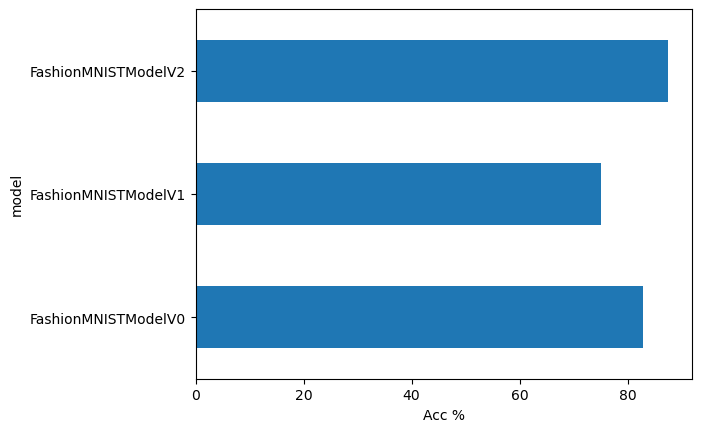

In [187]:
# Visualize our model results
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel('Acc %')
plt.ylabel('model')

#### 9. Make and evaluate random predictions with best model

Alright, we've compared our models to each other, let's further evaluate our best performing model.

To do so, let's create a function `make_predictions()` where we can pass the model and some data for it to predict on.

In [191]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    
    pred_probs = []
    model.eval()

    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # add extra dim

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
    
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [192]:
import random
random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f'Test sample image shape: {test_samples[0].shape}')
print(f'Test sample label: {test_labels[0]} ({class_names[test_labels[0]]})')

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [193]:
# Make predictions on test samples with model 2

pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[2.8500e-08, 2.9307e-10, 1.6685e-09, 7.5762e-10, 7.7914e-09, 9.9993e-01,
         7.2464e-07, 2.2744e-07, 3.0939e-06, 7.0139e-05],
        [2.5826e-01, 4.7431e-01, 2.9092e-03, 1.8732e-01, 2.7407e-02, 3.8552e-05,
         4.9087e-02, 2.7223e-04, 3.7948e-04, 1.7704e-05]])

And now we can go from prediction probabilities to prediction labels by taking the `torch.argmax()` of the output of the `torch.softmax()` activation function.

In [194]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 2, 3, 0, 4, 7, 1])

In [195]:
# Are our predictions in the same form as our test labels?
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 2, 3, 0, 4, 7, 1]))

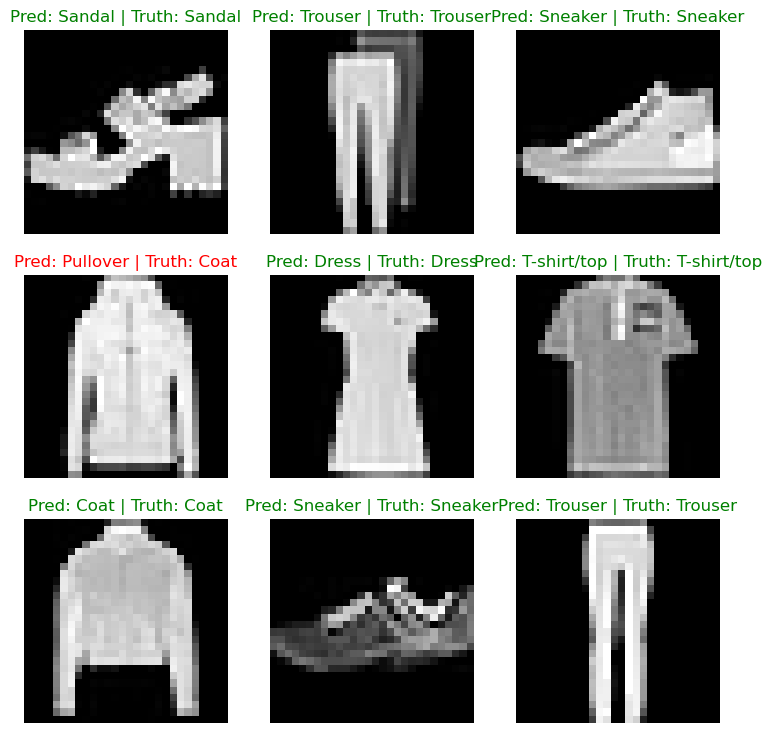

In [196]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    # Create a subplot
    plt.subplot(nrows, ncols, i+1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap='gray')

    # Find the prediction label (in text form, e.g. 'Sandal')
    pred_label = class_names[pred_classes[i]]

    # Get the truth label (in text form, e.g. 'T-shirt')
    truth_label = class_names[test_labels[i]]

    # Create the title text of the plot
    title_text = f'Pred: {pred_label} | Truth: {truth_label}'

    # Check for equality and change title colour accordingly
    if pred_label == truth_label:
        plt.title(title_text, c='g') # green text if correct
    else:
        plt.title(title_text, c='r') # red text if wrong
    plt.axis(False)

#### 10. Making a confusion matrix for further prediction evaluation

There are many different evaluation matrics we can use for classification problems.

One of the most visual is a confusion matrix.

A confusion matrix shows you where your classification model got confused between predictions and true labels.

To make a confusion matrix, we'll go through three steps:
1. Make prediction with our trained
2. Make a confusion matrix using `torchmetrics.ConfusionMatrix`.
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [197]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc='Making predictions'):
        # Send data and targets to target device
        X, y = X.to(device), y.to(device)

        # Do the forward pass
        y_logit = model_2(X)

        # Turn predictions from logits -> prediction probabilities -> prediction labels
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)

        # Put predictions on CPU for evaluation
        y_preds.append(y_pred.cpu())

y_preds_tensor = torch.cat(y_preds)

Making predictions: 100%|██████████| 313/313 [00:01<00:00, 166.47it/s]


In [198]:
import mlxtend
print(mlxtend.__version__)

0.22.0


First we'll create a `torchmetrics.ConfusionMatrix` instance telling it how many classes we're dealing with by setting `num_classes=len(class_names)`.

Then we'll create a confucsion matrix by passing our instance of our model's prediction (`preds=y_pred_tensor`) and targets (`target=test_data.targets`)

Finally we can plot our confusion matrix using the `plot_confusion_matrix()` function `mlxtend.plotting`.

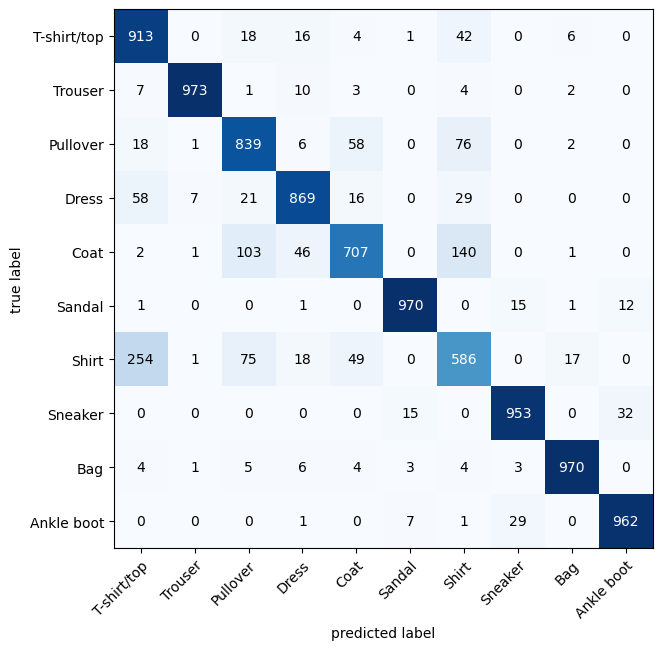

In [200]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_preds_tensor, target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

#### 11. Save and load best performing model

Combination of:
* `torch.save` - a function to save a model or a model's **state_dict()**.
* `torch.load` - a function to load in a saved PyTorch object.
* `torch.nn.Module.load_state_dict()` - a function to load a saved `state_dict()` into an existing model instance.

In [201]:
from pathlib import Path

# Create models directy
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, # Create parent directories if needed
                 exist_ok=True) # if models directory already exists, don't error

# Create model save path
MODEL_NAME = '03_py_torch_computer_vision_model_2.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models\03_py_torch_computer_vision_model_2.pth


In [202]:
# Create a new instance of FashionMNISTModelV2
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=10)

# Load in the saved state_dict9)
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

In [203]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(model=loaded_model_2,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.33830949664115906,
 'model_acc': 87.43011182108626}

In [204]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.33830949664115906,
 'model_acc': 87.43011182108626}

We can find out if two tensors are close to each other using `torch.isclose()` and passing in a tolerance level of closeness via the parameters `atol` (absolute tolerance) and `rtol` (relative tolerance).

If our model's results are close, the output of `torch.isclose()` should be true.

In [205]:
# Check to see if results are close to each other
torch.isclose(torch.tensor(model_2_results['model_loss']),
              torch.tensor(loaded_model_2_results['model_loss']),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)